#Vehicle silhouettes

##Objective
To classify a given silhouette as one of four types of vehicle, 	using a set of features extracted from the silhouette. The 	vehicle may be viewed from one of many different angles.   

##Description

###The features were extracted from the silhouettes by the HIPS
(Hierarchical Image Processing System) extension BINATTS, which extracts a combination of scale independent features utilising	both classical moments based measures such as scaled variance,	skewness and kurtosis about the major/minor axes and heuristic	measures such as hollows, circularity, rectangularity and	compactness. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400.	This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
	
##Source: https://www.kaggle.com/rajansharma780/vehicle

## ATTRIBUTES
1.	compactness	float	average perimeter**2/area
2.	circularity	float	average radius**2/area
3.	distance_circularity	float	area/(av.distance from border)**2
4.	radius_ratio	float	(max.rad-min.rad)/av.radius
5.	pr_axis_aspect_ratio	float	(minor axis)/(major axis)
6.	max_length_aspect_ratio	float	(length perp. max length)/(max length)
7.	scatter_ratio	float	(inertia about minor axis)/(inertia about major axis)
8.	elongatedness	float	area/(shrink width)**2
9.	pr_axis_rectangularity	float	area/(pr.axis length*pr.axis width)
10.	max_length_rectangularity	float	area/(max.length*length perp. to this)
11.	scaled_variance_major_axis	float	(2nd order moment about minor axis)/area
12.	scaled_variance_minor_axis	float	(2nd order moment about major axis)/area
13.	scaled_radius_gyration	float	(mavar+mivar)/area
14.	skewness_major_axis	float	(3rd order moment about major axis)/sigma_min**3
15.	skewness_minor_axis	float	(3rd order moment about minor axis)/sigma_maj**3
16.	kurtosis_minor_axis	float	(4th order moment about major axis)/sigma_min**4
17.	kurtosis_major_axis	float	(4th order moment about minor axis)/sigma_maj**4
18.	hollows_ratio	float	(area of hollows)/(area of bounding polygon)

##Target variable
19.	vehicle_class	string	Predictor Class. Values: Opel, Saab, Bus, Van	

#Tasks:
1.	Obtain the multi-class dataset from the given link
2.	Load the dataset
3.	Apply pre-processing techniques: Encoding, Scaling
4.	Divide the dataset into training (70%) and testing (30%)
5.	Build your own random forest model from scratch (using invidual decision tree model from sklearn)
6.	Train the random forest model
7.	Test the random forest model
8.	Train and test the random forest model using sklearn.
9.	Compare the performance of both the models

##Useful links:
https://machinelearningmastery.com/implement-random-forest-scratch-python/

https://towardsdatascience.com/random-forests-and-decision-trees-from-scratch-in-python-3e4fa5ae4249

https://www.analyticsvidhya.com/blog/2018/12/building-a-random-forest-from-scratch-understanding-real-world-data-products-ml-for-programmers-part-3/

# Part 1: Random Forest from scratch

Random forests are an ensemble learning method for classification and regression that operate by constructing multiple decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [12]:
# Load the libraries
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Sklearn linear regression model
from sklearn.linear_model import LinearRegression

# Sklearn regression model evaluation functions
from sklearn.metrics import r2_score

# Perform feature selection using a variance threshold
from sklearn.feature_selection import VarianceThreshold

# Feature selection using Recursive Feature Elimimation
from sklearn.feature_selection import RFE
import seaborn as sns

In [2]:
# Load the dataset 
data= pd.read_csv('data/vehicle.csv')
data.head()



,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
data.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
data.shape

(846, 19)

In [6]:
data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [9]:
# Preprocessing
# Encoding categorical variables (if any)
# Feature Scaling
# Filling missing values (if any)
labelencoder = LabelEncoder()
data['class'] = labelencoder.fit_transform(data['class'])
data.head()





,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


C:\Users\Avinash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Avinash\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Avinash\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Avinash\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_l

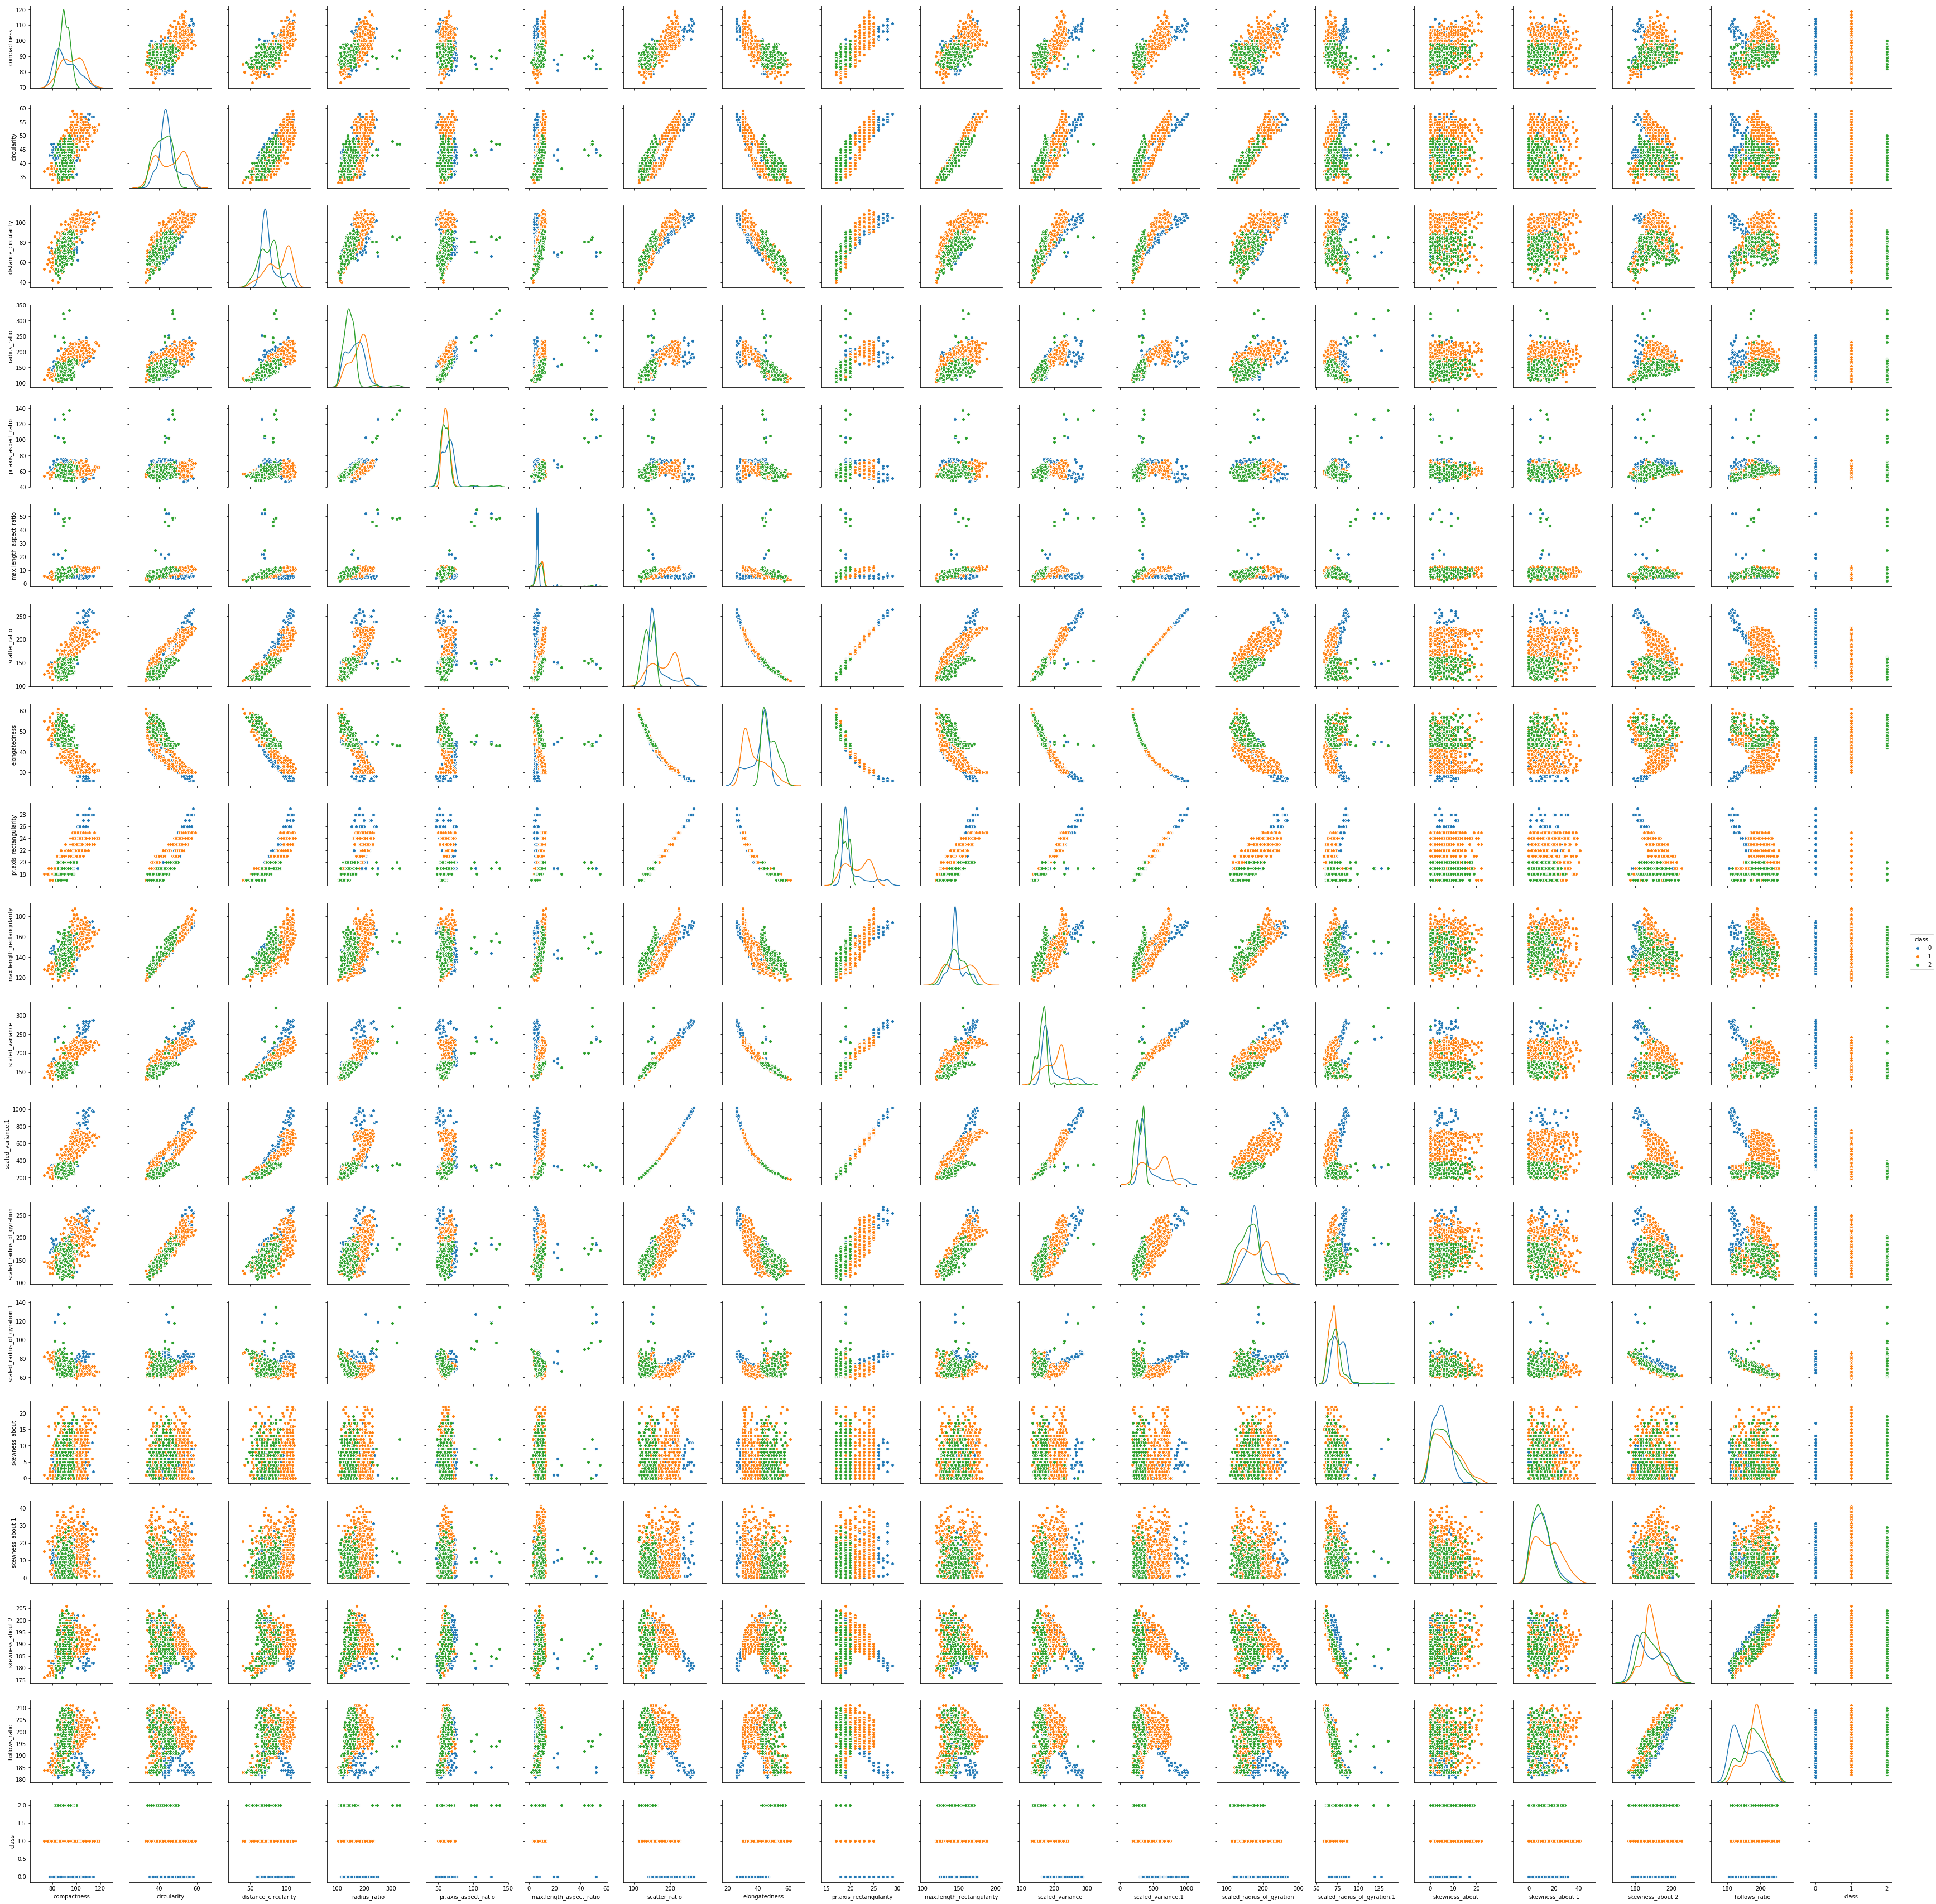

In [14]:
sns.pairplot(data,diag_kind='kde',hue='class')

In [10]:
data['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

In [19]:
missing_values_cols=data.columns[data.isnull().any()]
print(missing_values_cols)
# Number of missing values in each column
data[missing_values_cols].isnull().sum()

Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2'],
      dtype='object')


circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [17]:
data[data.isnull().any(axis=1)][missing_values_cols].shape

(33, 14)

In [18]:
columns= data.columns
columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [41]:
for i in columns:
    data[i]=data[i].fillna(method='ffill')

In [43]:
#data.columns[data.isnull().any()]
a=data.columns[data.isnull().any()]
data[data.isnull().any(axis=1)][a].shape


(0, 0)

In [46]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


In [64]:
features=['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']

In [66]:
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])
data.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,0.242105,0.233813,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333,2
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,0.210526,0.175060,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000,2
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,0.489474,0.540767,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000,1
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,0.157895,0.149880,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667,2
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,0.584211,0.169065,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667,0
5,0.739130,0.423077,0.916667,0.296943,0.032967,0.075472,0.934641,0.000000,0.916667,0.728571,0.789474,0.926859,0.974843,0.342105,0.227273,0.219512,0.166667,0.066667,0
6,0.521739,0.384615,0.458333,0.301310,0.197802,0.075472,0.267974,0.457143,0.166667,0.357143,0.242105,0.212230,0.396226,0.092105,0.590909,0.024390,0.800000,0.766667,0
7,0.369565,0.384615,0.361111,0.231441,0.197802,0.132075,0.163399,0.628571,0.083333,0.400000,0.168421,0.116307,0.345912,0.105263,0.136364,0.073171,0.566667,0.700000,2
8,0.282609,0.038462,0.305556,0.157205,0.153846,0.094340,0.065359,0.800000,0.000000,0.128571,0.057895,0.046763,0.018868,0.065789,0.090909,0.341463,0.800000,0.900000,2
9,0.434783,0.423077,0.805556,0.157205,0.164835,0.169811,0.464052,0.285714,0.416667,0.400000,0.378947,0.384892,0.270440,0.065789,0.181818,0.341463,0.633333,0.766667,1


In [67]:
X=data.drop('class',axis=1)
y=data['class']

In [68]:
# Divide the dataset to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(592, 18)
(254, 18)
(592,)
(254,)


In [ ]:
# Randomly choose the features from training set and build decision tree
# Randomness in the features will help us to achieve different DTrees every time
# You can keep minimum number of random features every time so that trees will have sufficient features
# Note: You can use builtin function for DT training using Sklearn




In [ ]:
# Train N number of decision trees using random feature selection strategy
# Number of trees N can be user input




In [ ]:
# Apply different voting mechanisms such as 
# max voting/average voting/weighted average voting (using accuracy as weightage)
# Perform the ensembling for the training set.


In [ ]:
# Apply invidual trees trained on the testingset
# Note: You should've saved the feature sets used for training invidual trees,
# so that same features can be chosen in testing set

# Get predictions on testing set

In [ ]:
# Evaluate the results using accuracy, precision, recall and f-measure



In [ ]:
# Compare different voting mechanisms and their accuracies



In [ ]:
# Compare the Random forest models with different number of trees N



In [ ]:
# Compare different values for minimum number of features needed for individual trees




## Part 2: Random Forest using Sklearn

In [ ]:
# Use the preprocessed dataset here



In [ ]:
# Train the Random Forest Model using builtin Sklearn Dataset



In [ ]:
# Test the model with testing set and print the accuracy, precision, recall and f-measure



In [ ]:
# Play with parameters such as
# number of decision trees
# Criterion for splitting
# Max depth
# Minimum samples per split and leaf